# Code for paper

This Python Notebook takes a data file with bibliometric data sources stored on Zenodo (https://doi.org/10.5281/zenodo.15037456) and creates the table and figures used in the article.

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker
import numpy as np
import seaborn as sns

In [ ]:
data = pd.read_csv([store_zenodo_data_file_on your drive]) # https://doi.org/10.5281/zenodo.15037456

### table 1

In [ ]:
#count articles, not instances
arts_count = all[['DOI', 'journal', 'ds_or_not']].drop_duplicates()
arts_count = arts_count.value_counts(['journal', 'ds_or_not']).reset_index()
# table_1.sort_values(by=['journal'], ascending=False)
table_1 = pd.pivot_table(arts_count, values='count', index='journal',
                         columns=['ds_or_not'], aggfunc="sum")

In [ ]:
table_1

ds_or_not,data reuse,ds,no data source found,non-emp,quest
journal,,,,,
JoI,41.0,976.0,8.0,99.0,24.0
QSS,7.0,157.0,NaN,31.0,5.0
Scientometrics,207.0,5058.0,120.0,554.0,271.0


### separate tables for figures

In [ ]:
# all rows with data sources:
all_ds = all[all['ds_or_not'] == 'ds']

# divide between bibl_data and non_bibl_data as they have been registered in different ways:
all_bibl = all_ds[all_ds['bibl_no_bibl'] == 'bibl']
all_non_bibl = all_ds[all_ds['bibl_no_bibl'] != 'bibl']

### bibl data
# control of bibl_data as there are some early rows where JCR is counted separately from WoS, for example
bibl_list = ['bibl_data', 'country_bibl_data']

all_bibl_bibl = all_bibl[all_bibl['norm_coarse'].isin(bibl_list)]
# no duplicates among bibl_data
bibl_bibl_no_dupl = all_bibl_bibl[['publ_year', 'DOI', 'norm_fine', 'norm_coarse', 'no_countries', 'bibl_no_bibl', 'bibl_metadata', 'period']].drop_duplicates()

# duplicates among the other bibl_data
all_bibl_other = all_bibl[~all_bibl['norm_coarse'].isin(bibl_list)]
bibl_other_no_dupl = all_bibl_other[['publ_year', 'DOI', 'norm_coarse', 'no_countries', 'bibl_no_bibl', 'bibl_metadata', 'period']].drop_duplicates()
bibl_other_no_dupl['norm_fine'] = ''

bibl_data_dedup = pd.concat([bibl_bibl_no_dupl, bibl_other_no_dupl])


### non_bibl_data
all_non_bibl_dedup = all_non_bibl[['publ_year', 'DOI', 'norm_coarse', 'no_countries', 'bibl_no_bibl', 'bibl_metadata', 'period']].drop_duplicates()
all_non_bibl_dedup['norm_fine'] = ''

# joint table without dupl
all_dedup = pd.concat([bibl_data_dedup, all_non_bibl_dedup])

# joint table for category comparison
all_dedup_coarse = all_dedup.drop('norm_fine', axis=1).drop_duplicates()

### figure 1: overview bubble chart

In [ ]:
# table with categories per year
bubble_chart_table = all_dedup_coarse.value_counts(['publ_year', 'bibl_metadata']).reset_index()
bubble_chart_table['year_sum'] = bubble_chart_table.groupby('publ_year')['count'].transform('sum')
bubble_chart_table['rel_size'] = bubble_chart_table['count']/bubble_chart_table['year_sum']*100

In [1]:

bubble_chart_table.sort_values(by=['publ_year'], inplace=True, ascending=False)


fig, ax = plt.subplots()

scatter_1 =ax.scatter(bubble_chart_table['publ_year'], bubble_chart_table['bibl_metadata'],
           s=bubble_chart_table['count'], color = 'LightSalmon', label = bubble_chart_table['count'])

scatter_2 =ax.scatter(bubble_chart_table['publ_year'], bubble_chart_table['bibl_metadata'],
           s=bubble_chart_table['rel_size'], color = 'IndianRed', label = bubble_chart_table['rel_size'])

plt.xticks(rotation=90)

for label in ax.xaxis.get_ticklabels()[0::6]:
    label.set_visible(False)


box = ax.get_position()

handles, labels = scatter_1.legend_elements(prop='sizes', num=5, color='LightSalmon')
legend1 = ax.legend(handles, labels, title='count', bbox_to_anchor=(1, 1))#, loc='center left')
ax.add_artist(legend1)

handles, labels = scatter_2.legend_elements(prop='sizes', num=4, color = 'IndianRed')
legend2 = ax.legend(handles, labels, title='%', bbox_to_anchor=(1, 0.5))#, loc='center left')
ax.add_artist(legend2)

fig.tight_layout()

#plt.show()

#plt.savefig('', bbox_inches = "tight", bbox_extra_artists=(legend1, legend2))


NameError: name 'bubble_chart_table' is not defined

### figure 2: wos,scopus and rest for bibl metadata sources

In [ ]:
# check of Scopus and country_bibl_share
check = bibl_data_dedup[['DOI', 'norm_fine', 'norm_coarse', 'publ_year']].drop_duplicates()
pd.pivot_table(check, values='DOI', index='publ_year', columns='norm_coarse', aggfunc = 'count')

norm_coarse,bibl_data,country_bibl_data,fulltext,publisher,scopus,wos
publ_year,,,,,,
1978,1.0,NaN,1.0,NaN,NaN,2.0
1979,9.0,1.0,1.0,NaN,NaN,5.0
1980,2.0,2.0,1.0,NaN,NaN,5.0
1981,2.0,3.0,7.0,NaN,NaN,9.0
1982,4.0,NaN,6.0,NaN,NaN,4.0
1983,7.0,NaN,4.0,NaN,NaN,10.0
1984,3.0,NaN,3.0,NaN,NaN,3.0
1985,4.0,3.0,6.0,NaN,NaN,22.0
1986,18.0,5.0,4.0,NaN,NaN,9.0


In [ ]:
# create rest, everything but wos and scopus:
wos_scopus_other = bibl_data_dedup[['DOI', 'norm_fine', 'norm_coarse', 'publ_year']].drop_duplicates()
# remove publisher and full text
wos_scopus_other = wos_scopus_other[wos_scopus_other['norm_coarse'].isin(['wos', 'scopus', 'bibl_data', 'country_bibl_data'])]
wos_scopus_other.loc[~wos_scopus_other['norm_coarse'].isin(['wos','scopus']), 'norm_coarse'] = 'other'

c = pd.pivot_table(wos_scopus_other, values='DOI', index='publ_year', columns='norm_coarse', aggfunc = 'count')

c = c.fillna(0)
c['total_per_year'] = c['scopus']+c['wos']+c['other']

c['other_share'] = c['other']/c['total_per_year']*100
c['wos_share'] = c['wos']/c['total_per_year']*100
c['scopus_share'] = c['scopus']/c['total_per_year']*100

overview_plot = c[['wos_share', 'scopus_share', 'other_share']] # order here decides order in plot

Text(0, 0.5, 'Percentage (bibliographical metadata sources only)')

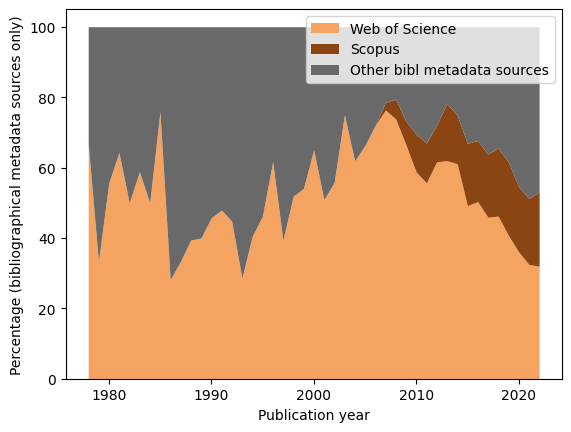

In [ ]:
proper_labels = ('Web of Science', 'Scopus', 'Other bibl metadata sources')
colors = ('sandybrown', 'saddlebrown', 'dimgrey')
# legend mixes up if not this:
my_map = {'wos_share':'Web of Science', 'scopus_share':'Scopus', 'other_share':'Other bibl metadata sources'}


#overview_plot.plot(kind = 'area', linewidth = 0) #, color = colors)
ax = overview_plot.plot.area(linewidth = 0, color = colors)

# legend mixes up if not this:
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, [my_map[l] for l in labels], loc='upper right')

plt.xlabel('Publication year')
plt.ylabel('Percentage (bibliographical metadata sources only)')

#plt.savefig('', dpi=300, bbox_inches = "tight")

### figure 3: other bibl metadata sources

In [ ]:
# most used bibl sources (except wos and scopus)

all_bibl_bibl['norm_fine'].value_counts().head(10)

,count
norm_fine,
medline,259
gs,220
other,214
china,94
dblp,80
mas,77
netherlands,61
inspec,57
italy,55


In [ ]:
all_bibl_bibl.loc[~all_bibl_bibl['norm_fine'].isin(['medline','gs', 'china', 'dblp', 'mas', 'netherlands', 'inspec', 'italy', 'ca']), 'norm_fine'] = 'other'

g = pd.pivot_table(all_bibl_bibl, values='DOI', index='publ_year', columns='norm_fine', aggfunc = 'count')

g = g.fillna(0)

g['total_per_year'] = g['medline']+g['gs']+g['dblp']+g['mas']+g['inspec']+g['ca']+g['other']


g['medline'] = g['medline']/g['total_per_year']*100
g['gs'] = g['gs']/g['total_per_year']*100
g['china'] = g['china']/g['total_per_year']*100
g['dblp'] = g['dblp']/g['total_per_year']*100
g['mas'] = g['mas']/g['total_per_year']*100
g['netherlands'] = g['netherlands']/g['total_per_year']*100
g['inspec'] = g['inspec']/g['total_per_year']
g['italy'] = g['italy']/g['total_per_year']
g['ca'] = g['ca']/g['total_per_year']*100
g['other'] = g['other']/g['total_per_year']*100


detailed_plot_bibl_ds = g[['medline', 'ca', 'dblp', 'gs', 'mas', 'inspec', 'china', 'netherlands', 'italy']]

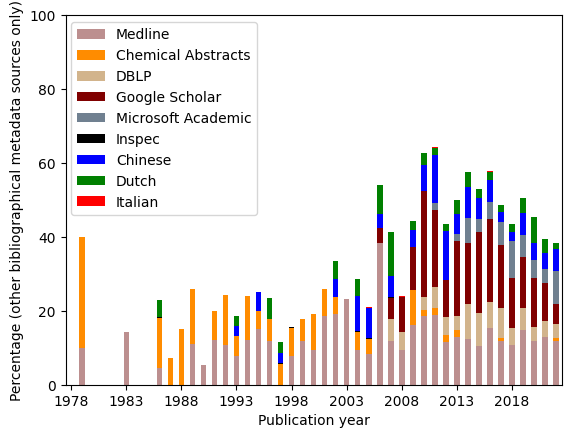

In [ ]:
proper_labels = ['Medline', 'Chemical Abstracts', 'DBLP', 'Google Scholar', 'Microsoft Academic', 'Inspec', 'Chinese', 'Dutch', 'Italian']
colors = ('rosybrown', 'darkorange', 'tan', 'maroon', 'slategrey', 'black', 'blue', 'green', 'red')

det_p_ds = detailed_plot_bibl_ds.plot(kind='bar', linewidth=0, stacked = True, color = colors, rot = 0)
# Shrink current axis by 20%
box = det_p_ds.get_position()
det_p_ds.set_position([box.x0, box.y0, box.width * 1, box.height])

det_p_ds.set_ylim([0, 100])

plt.xlabel('Publication year')
plt.ylabel('Percentage (other bibliographical metadata sources only)')

det_p_ds.xaxis.set_major_locator(ticker.AutoLocator())

plt.legend(loc='upper right', labels = proper_labels, bbox_to_anchor=(0.4, 1))

#plt.savefig('', dpi=300, bbox_inches = "tight")

plt.show()

# Data sources used together

In [ ]:
# counting how many ds for each art id
count = all_dedup_coarse['DOI'].value_counts()
all_dedup_coarse['ds_count'] = all_dedup_coarse['DOI'].map(count)

### figure 7: over time

only norm_coarse counted, not_norm_fine, which mean data source categories, not data sources

In [ ]:
# filter for data sources
together = all_dedup_coarse.copy()

# function for aggregating counts:
def g(row):
    if row['ds_count'] == 1:
        val = 1
    elif row['ds_count'] == 2:
        val = 2
    elif row['ds_count'] == 3:
        val = 3
    else:
        val = 4
    return val

together['ds_count_agg'] = together.apply(g, axis=1)

ds_together_table = pd.pivot_table(together, values='DOI', index='period', columns='ds_count_agg', aggfunc = 'count')


ds_together_table['total'] = ds_together_table.sum(axis=1)
ds_together_table = ds_together_table.fillna(0)

# calculate shares: (https://stackoverflow.com/questions/18504967/create-new-columns-and-fill-with-calculated-values-from-same-dataframe)
ds_together_table = ds_together_table.join(ds_together_table.div(ds_together_table['total'], axis=0)*100, rsuffix='_perc')
ds_together_table = ds_together_table.filter(like='perc', axis=1)

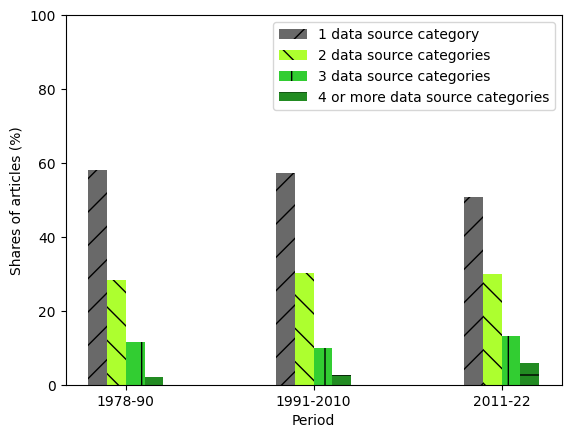

In [ ]:
x = np.arange(3)
width = 0.1
plt.bar(x-0.15, ds_together_table['1_perc'], width, color='dimgrey', hatch ='/')
plt.bar(x-0.05, ds_together_table['2_perc'], width, color='greenyellow', hatch ='\\')
plt.bar(x+0.05, ds_together_table['3_perc'], width, color='limegreen', hatch ='|')
plt.bar(x+0.15, ds_together_table['4_perc'], width, color='forestgreen', hatch ='-')
plt.ylim(0, 100)
plt.xticks(x, ['1978-90', '1991-2010', '2011-22'])
plt.xlabel('Period')
plt.ylabel('Shares of articles (%)')
plt.legend(['1 data source category',
                 '2 data source categories',
                 '3 data source categories',
                 '4 or more data source categories'])

#plt.savefig('', dpi=300, bbox_inches = "tight")

plt.show()

### figure 8: data source categories most frequently used together




In [ ]:
# find the most frequent categories:
all_dedup_coarse['norm_coarse'].value_counts()

,count
norm_coarse,
wos,2996
bibl_data,1291
scopus,793
country_non_bibl_data,683
fulltext,574
patent,566
country_bibl_data,503
non_bibl_data,496
altmetrics,216


In [ ]:
all_dedup_filter = all_dedup_coarse.loc[all_dedup_coarse['norm_coarse'].isin(['wos', 'bibl_data', 'scopus',
                                                                            'country_non_bibl_data',
                                                                            'fulltext', 'patent',
                                                                            'country_bibl_data',
                                                                            'non_bibl_data'])]

# function for aggregating bibl_data and non_bibl_data:
def f(row):
    if row['norm_coarse'] == 'bibl_data' or row['norm_coarse'] == 'country_bibl_data':
        val = 'other bibl metadata'
    elif row['norm_coarse'] == 'non_bibl_data' or row['norm_coarse'] ==  'country_non_bibl_data':
        val = 'other non bibl'
    elif row['norm_coarse'] == 'fulltext':
        val = 'full text'
    else:
        val = row['norm_coarse']
    return val

all_dedup_filter['cats'] = all_dedup_filter.apply(f, axis=1)

all_dedup_filter_crosstab = pd.crosstab(all_dedup_filter.DOI, all_dedup_filter.cats)

cooccurences = all_dedup_filter_crosstab.T.dot(all_dedup_filter_crosstab)
np.fill_diagonal(cooccurences.values, 0)
cooccurences

<ipython-input-150-690b77084320>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_dedup_filter['cats'] = all_dedup_filter.apply(f, axis=1)


cats,full text,other bibl metadata,other non bibl,patent,scopus,wos
cats,,,,,,
full text,0,100,35,5,28,102
other bibl metadata,100,0,282,38,224,505
other non bibl,35,282,0,105,127,350
patent,5,38,105,0,16,119
scopus,28,224,127,16,0,244
wos,102,505,350,119,244,0


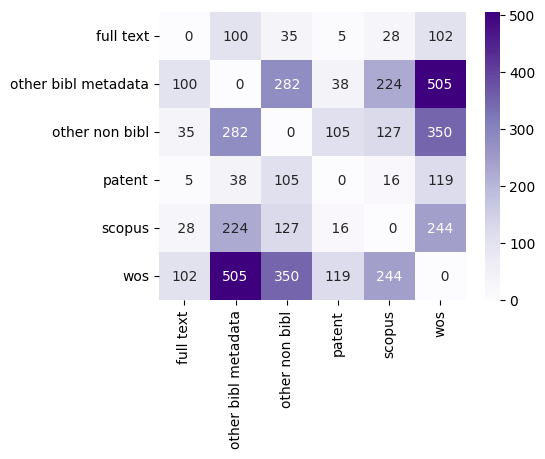

In [ ]:
heat_plot = sns.heatmap(cooccurences, cmap = 'Purples', annot = True, fmt = '3') # annot = True
fig = heat_plot.get_figure()

plt.xlabel('')
plt.ylabel('')
plt.xticks(rotation=90)
plt.subplots_adjust(left=0.3, right=0.9, bottom=0.3, top=0.9)

plt.show()

#fig.savefig('', dpi=300, bbox_inches = "tight")

# check this for tip on half plot:
# https://stackoverflow.com/questions/57414771/how-to-plot-only-the-lower-triangle-of-a-seaborn-heatmap

## Time periods (all non bibl metadata sources)

In [ ]:
# data source category count
period_data = all_dedup_coarse[all_dedup_coarse['bibl_metadata'] != 'bibl metadata']
d = pd.pivot_table(period_data, values='DOI', index='publ_year', columns='no_countries', aggfunc = 'count')


# count shares
d = d.fillna(0)
d['total_per_year'] = d.sum(axis=1)
d.loc['total_per_ds'] = pd.Series(d.sum())
d['non_bibl_data_share'] = d['non_bibl_data']/d['total_per_year']*100
d['fulltext_share'] = d['fulltext']/d['total_per_year']*100
d['publisher_share'] = d['publisher']/d['total_per_year']*100
d['web data_share'] = d['web data']/d['total_per_year']*100
d['ranking_share'] = d['ranking']/d['total_per_year']*100
d['altmetrics_share'] = d['altmetrics']/d['total_per_year']*100
d['patent_share'] = d['patent']/d['total_per_year']*100

detailed_plot = d[['non_bibl_data', 'fulltext', 'publisher',
               'web data', 'ranking', 'altmetrics',
                   'patent', 'total_per_year',
                   'non_bibl_data_share', 'fulltext_share', 'publisher_share',
                   'web data_share',  'ranking_share',
                   'altmetrics_share', 'patent_share']]



detailed_plot_up_to_1990 = detailed_plot.loc[:1990]

detailed_plot_1991_2010 = detailed_plot.loc[1991:2010]

detailed_plot_from_2011 = detailed_plot.loc[2011:]

### figure 4: 1978-1990

In [ ]:
detailed_plot_up_to_1990 = detailed_plot_up_to_1990.reset_index()

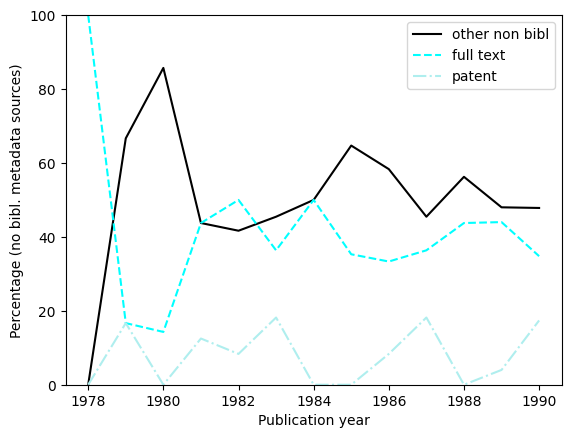

In [ ]:
proper_labels = ['other non bibl', 'full text', 'patent']
x = detailed_plot_up_to_1990['publ_year']

plt.plot(x, detailed_plot_up_to_1990['non_bibl_data_share'], color='black', ls ='-')
plt.plot(x, detailed_plot_up_to_1990['fulltext_share'], color='cyan', ls ='--')
plt.plot(x, detailed_plot_up_to_1990['patent_share'], color='paleturquoise', ls ='-.')


plt.ylim(0, 100)
plt.legend(proper_labels)
plt.xlabel('Publication year')
plt.ylabel('Percentage (no bibl. metadata sources)')

#plt.savefig('', dpi=300, bbox_inches = "tight")

plt.show()

### figure 5: 1991-2010

In [ ]:
detailed_plot_1991_2010 = detailed_plot_1991_2010.reset_index()

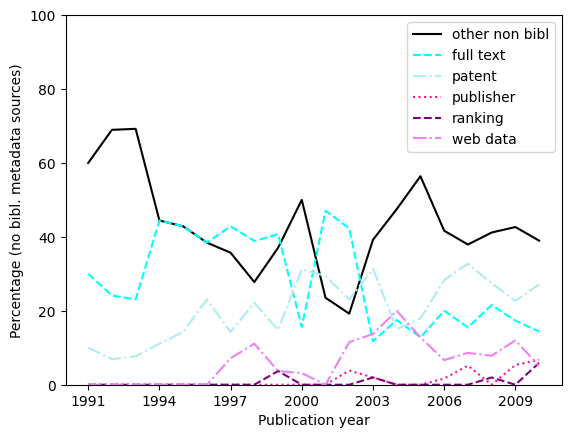

In [ ]:
proper_labels = ['other non bibl', 'full text', 'patent', 'publisher', 'ranking', 'web data']
x = detailed_plot_1991_2010['publ_year']

plt.plot(x, detailed_plot_1991_2010['non_bibl_data_share'], color='black', ls ='-')
plt.plot(x, detailed_plot_1991_2010['fulltext_share'], color='cyan', ls ='--')
plt.plot(x, detailed_plot_1991_2010['patent_share'], color='paleturquoise', ls ='-.')
plt.plot(x, detailed_plot_1991_2010['publisher_share'], color='deeppink', ls =':')
plt.plot(x, detailed_plot_1991_2010['ranking_share'], color='purple', ls ='--')
plt.plot(x, detailed_plot_1991_2010['web data_share'], color='violet', ls ='-.')

plt.ylim(0, 100)
plt.xticks(np.arange(1991, 2010, step=3))
plt.legend(proper_labels)
plt.xlabel('Publication year')
plt.ylabel('Percentage (no bibl. metadata sources)')

#plt.savefig('', dpi=300, bbox_inches = "tight")

plt.show()

### figure 6: 2011-2022

In [ ]:
detailed_plot_from_2011 = detailed_plot_from_2011.reset_index()
# remove total row:
detailed_plot_from_2011 = detailed_plot_from_2011.drop(12)

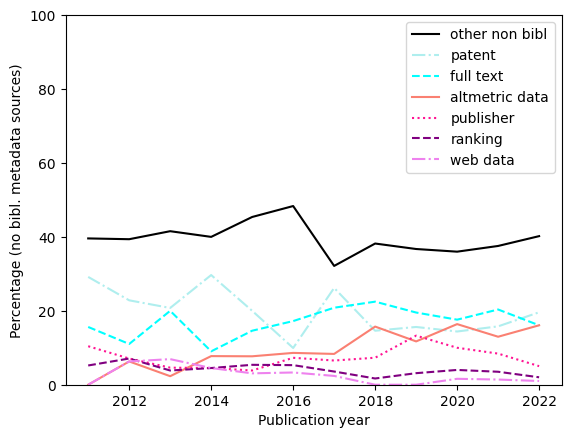

In [ ]:
proper_labels = ['other non bibl', 'patent', 'full text','altmetric data', 'publisher', 'ranking', 'web data']
x = detailed_plot_from_2011['publ_year']

plt.plot(x, detailed_plot_from_2011['non_bibl_data_share'], color='black', ls ='-')
plt.plot(x, detailed_plot_from_2011['patent_share'], color='paleturquoise', ls ='-.')
plt.plot(x, detailed_plot_from_2011['fulltext_share'], color='cyan', ls ='--')
plt.plot(x, detailed_plot_from_2011['altmetrics_share'], color='salmon', ls ='-')
plt.plot(x, detailed_plot_from_2011['publisher_share'], color='deeppink', ls =':')
plt.plot(x, detailed_plot_from_2011['ranking_share'], color='purple', ls ='--')
plt.plot(x, detailed_plot_from_2011['web data_share'], color='violet', ls ='-.')

plt.ylim(0, 100)
plt.legend(proper_labels)
plt.xlabel('Publication year')
plt.ylabel('Percentage (no bibl. metadata sources)')

# plt.savefig('', dpi=300, bbox_inches = "tight")

plt.show()